In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from bitcoin import core

core = core.Core()
df = core.load_sql_data()
df.dtypes

2018-03-16 16:01:41,172 root         INFO     ENV => test
2018-03-16 16:01:41,173 root         INFO     Load data from SQL.


time                  int64
low                 float64
high                float64
open                float64
close               float64
volume              float64
tw_sentiment        float64
tw_followers        float64
reddit_sentiment    float64
google_sentiment    float64
predicted_price     float64
dtype: object

In [6]:
df[df.isnull().any(axis=1)]

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment,predicted_price


In [7]:
df.describe()

,time,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment,predicted_price
count,1.533400e+04,15334.000000,15334.000000,1.533400e+04,15334.000000,15334.000000,15334.0
mean,1.520736e+09,1.820444,0.065645,4.457051e+05,0.066102,0.035188,0.0
std,2.699205e+05,3.939317,0.082608,3.143615e+05,0.034651,0.063812,0.0
min,1.520272e+09,0.000673,-0.084993,3.705000e+04,-0.028105,-0.100305,0.0
25%,1.520503e+09,0.150000,0.021526,2.127692e+05,0.042802,-0.008443,0.0
50%,1.520733e+09,0.570060,0.046469,3.719840e+05,0.066204,0.030363,0.0
75%,1.520974e+09,1.841904,0.082921,5.527498e+05,0.085800,0.066000,0.0
max,1.521210e+09,90.488639,0.612404,1.987974e+06,0.173389,0.211511,0.0


In [4]:
df.corr()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment
time,1.000000,-0.757897,-0.759274,-0.758703,-0.758658,-0.017105,-0.199872,-0.637260,0.339032,-0.479087
low,-0.757897,1.000000,0.999814,0.999881,0.999916,-0.082617,0.059467,0.676433,-0.314056,0.661320
high,-0.759274,0.999814,1.000000,0.999916,0.999910,-0.068984,0.062432,0.677175,-0.314920,0.662374
open,-0.758703,0.999881,0.999916,1.000000,0.999841,-0.074009,0.060940,0.676820,-0.314758,0.661915
close,-0.758658,0.999916,0.999910,0.999841,1.000000,-0.076146,0.060634,0.676807,-0.314330,0.661719
volume,-0.017105,-0.082617,-0.068984,-0.074009,-0.076146,1.000000,0.158856,-0.040873,-0.014842,-0.018831
tw_sentiment,-0.199872,0.059467,0.062432,0.060940,0.060634,0.158856,1.000000,0.014115,-0.261894,0.167151
tw_followers,-0.637260,0.676433,0.677175,0.676820,0.676807,-0.040873,0.014115,1.000000,-0.302121,0.480259
reddit_sentiment,0.339032,-0.314056,-0.314920,-0.314758,-0.314330,-0.014842,-0.261894,-0.302121,1.000000,-0.491859
google_sentiment,-0.479087,0.661320,0.662374,0.661915,0.661719,-0.018831,0.167151,0.480259,-0.491859,1.000000


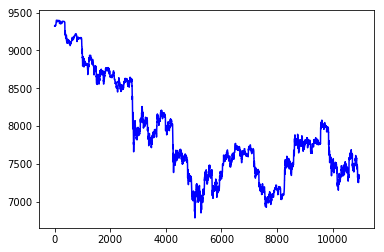

In [5]:
plt.plot(df['close'], 'b')

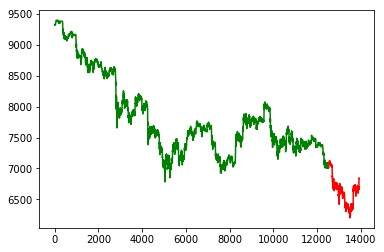

In [3]:
max = df['close'].count()
limit = int(0.1 * max)
plt.plot(df['close'][0:max - limit], 'g')
plt.plot(df['close'][-limit:], 'r')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f12b828>,
      dtype=object)

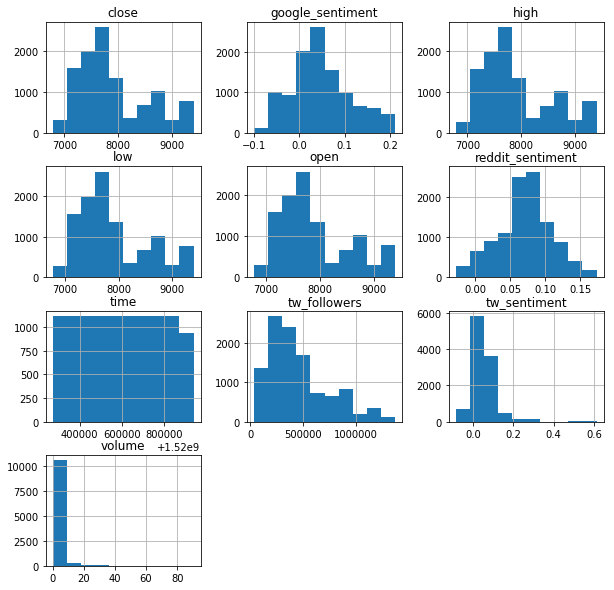

In [7]:
df.hist(figsize=(10,10))

In [8]:
X_train, X_test, y_train, y_test, scaler_x, scaler_y = core.prepare_inputs_outputs(df)

In [9]:
history = core.train()

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 200)            164800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 200)            320800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
__________

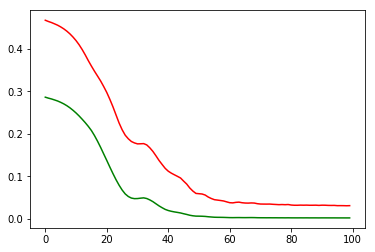

In [10]:
plt.plot(history.history['mean_absolute_error'], 'r')
plt.plot(history.history['mean_squared_error'], 'g')

In [13]:
core.test_order_percent()

Error Order percentage: 14.04%
TEST From 2018-03-11 02:49:00 to 2018-03-13 12:36:00
Number of api calls: 0.20 / min
Number of anomalies: 166
With prediction 1447.13 euros => 44.71% => 22.36% / day
Without prediction 1041.21 euros => 4.12% => 2.06% / day
